 # Importing libraries

In [72]:
import cv2
import glob
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

In [73]:
y_train=pd.read_csv("trainset.csv")

In [74]:
y_train["tumor type"].value_counts()

tumor type
pituitary_tumor     1654
glioma_tumor        1652
meningioma_tumor    1644
no_tumor             790
Name: count, dtype: int64

In [75]:
y_train["tumor type"]=y_train["tumor type"].replace("pituitary_tumor",1)
y_train["tumor type"]=y_train["tumor type"].replace("glioma_tumor",2)
y_train["tumor type"]=y_train["tumor type"].replace("no_tumor",0)
y_train["tumor type"]=y_train["tumor type"].replace("meningioma_tumor",3)

C:\Users\Shubh\AppData\Local\Temp\ipykernel_10552\2630086323.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train["tumor type"]=y_train["tumor type"].replace("meningioma_tumor",3)


In [76]:
y_train["tumor type"]=y_train["tumor type"].astype(int)

# Storing images in a dataframe 

In [77]:
image_train_name=glob.glob(r"train\*.jpg")
id=[]
images=[]
for images_name in image_train_name:

    split=images_name.replace("\\",".").split(".")
    id.append(split[1])
    image=cv2.imread(images_name,0)
#     _,binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# # Step 3: Convert to grayscale
#     image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY)
    images.append(image)
# images=np.array(images)
images=pd.DataFrame({"image":id,"array":images})


In [78]:
images["image"]=images["image"].astype(int)

In [79]:
images.shape

(5740, 2)

In [80]:
y_train.shape

(5740, 2)

In [81]:
y_train.value_counts()

image  tumor type
1      0             1
3813   1             1
3833   3             1
3832   2             1
3831   3             1
                    ..
1912   1             1
1911   3             1
1910   0             1
1909   2             1
5740   1             1
Name: count, Length: 5740, dtype: int64

In [82]:
images=images.merge(y_train,on="image",how="left")

In [83]:
images

,image,array,tumor type
0,1,"[[251, 255, 246, 250, 250, 252, 252, 246, 249,...",0
1,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
4,5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
...,...,...,...
5735,5736,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3
5736,5737,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2
5737,5738,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
5738,5739,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3


# Resizing images and creating in array 

In [84]:
target_size = (80, 80)

# Function to resize an image
def resize_image(image, target_size):
    pil_image = Image.fromarray((image * 255).astype(np.uint8))  # Convert to PIL Image
    resized_pil_image = pil_image.resize(target_size, Image.LANCZOS)  # Resize
    resized_image = np.array(resized_pil_image) / 255.0  # Convert back to NumPy array and normalize
    return resized_image

# Apply the resize function to each image in the list
resized_images = [resize_image(image, target_size) for image in images["array"]]

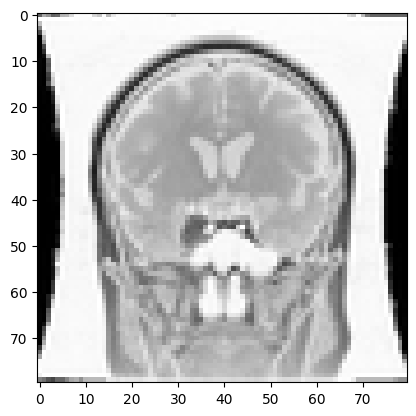

In [85]:
plt.imshow(resized_images[23],cmap="gray")
plt.show()
images_resize=np.array(resized_images)
images_resize=images_resize.reshape(5740,80*80)

In [86]:
x=images_resize

In [87]:
y=images["tumor type"]

In [88]:
x.shape

(5740, 6400)

In [89]:
y.shape

(5740,)

# Splitting dataset into train(80) and test(20)


In [90]:
x_train=x[0:4322,:]
y_train=y[0:4322]

In [91]:
x_test=x[4322:,:]
y_test=y[4322:]

In [92]:
y.value_counts()

tumor type
1    1654
2    1652
3    1644
0     790
Name: count, dtype: int64

# MODEL 

In [23]:
import keras
from keras import layers
from keras.utils import plot_model

# Define the model
model = keras.models.Sequential([
    keras.Input(shape=(80*80,)),  # Input layer with the shape of flattened i,
    # layers.Dense(1000, activation="sigmoid"),
    layers.Dense(500, activation="sigmoid"),
    layers.Dense(50, activation="sigmoid"),
    layers.Dense(30, activation="sigmoid"),
    layers.Dense(4, activation="sigmoid")  # Assuming a 4-class output
])

# Plot the model architecture
# plot_model(model, show_shapes=True, to_file='model.png')

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │     3,200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,227,204 (12.31 MB)

 Trainable params: 3,227,204 (12.31 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING 

In [93]:
model.compile(optimizer="Adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs =50  # set number of epochs
batch_size = 750      # you can tweak with these parametrs
history = model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=n_epochs)
print(history)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7427 - loss: 0.8219
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8240 - loss: 0.4687
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8820 - loss: 0.3775
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8965 - loss: 0.3443
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9026 - loss: 0.3189
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9068 - loss: 0.3055
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9088 - loss: 0.2979
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9118 - loss: 0.2876
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9143 - loss: 0.2738
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9183 - loss: 0.2726
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9178 - loss: 0.2743
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9132 - loss: 0.2700
E

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9087 - loss: 0.2609
Loss =  0.23270808160305023
Accuracy =  91.88998341560364 %


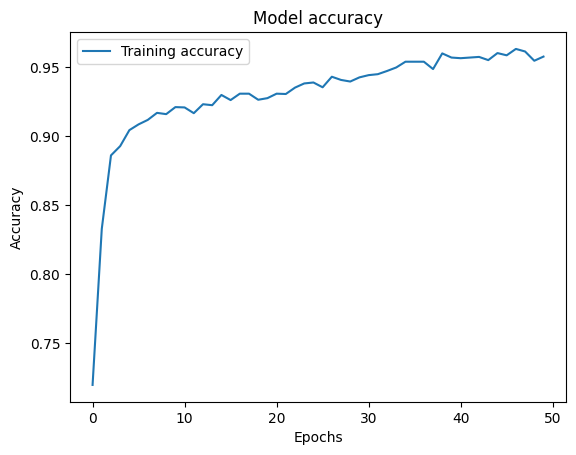

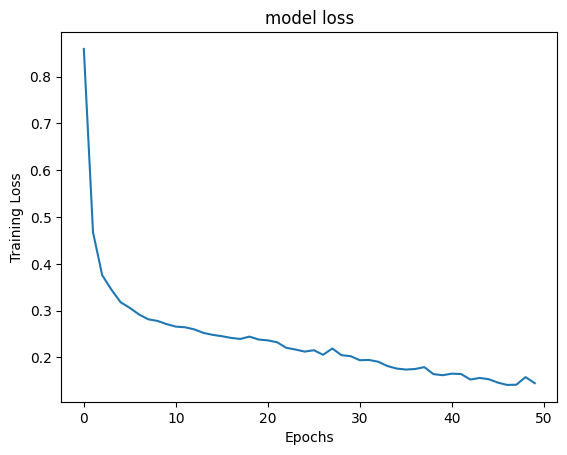

In [95]:
results = model.evaluate(x_test,y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history["accuracy"],label="Training accuracy")
# plt.plot(history.history["val_accuracy"], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history["loss"],)
plt.title("model loss")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

In [98]:
y_predict_train=model.predict(x_test)
y_predict_train_=[]
for i in range(y_predict_train.shape[0]):
    y_predict_train_.append(np.argmax(y_predict_train[i]))
y_predict_train_=np.array(y_predict_train_)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


# F1_Score

In [105]:
from sklearn.metrics import f1_score,confusion_matrix
f1score=f1_score(y_test,y_predict_train_,average="weighted")
print(f1score)

0.9181350347082292


In [110]:
confusion_matrix_=confusion_matrix(y_test,y_predict_train_)
confusion_matrix_

array([[180,   2,   2,   1],
       [  3, 369,   4,   4],
       [  0,   0, 408,  25],
       [ 24,   9,  41, 346]], dtype=int64)

# Test images 

In [111]:
test_image_train_name=glob.glob(r"test\*.jpg")
id=[]
test_images=[]
for images_name in test_image_train_name:

    split=images_name.replace("\\",".").split(".")
    id.append(split[1])
    image=cv2.imread(images_name,0)
    test_images.append(image)
# images=np.array(images)
test_images=pd.DataFrame({"image":id,"array":test_images})

In [112]:
test_images

,image,array
0,001,"[[255, 84, 111, 109, 106, 109, 109, 99, 107, 1..."
1,002,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,003,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,004,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,..."
4,005,"[[2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
389,390,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
390,391,"[[12, 12, 13, 13, 13, 14, 14, 14, 12, 12, 12, ..."
391,392,"[[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, ..."
392,393,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [113]:
test_images["image"]=test_images["image"].astype(int)

In [114]:
target_size = (80, 80)

# Function to resize an image
def resize_image(image, target_size):
    pil_image = Image.fromarray((image * 255).astype(np.uint8))  # Convert to PIL Image
    resized_pil_image = pil_image.resize(target_size, Image.LANCZOS)  # Resize
    resized_image = np.array(resized_pil_image) / 255.0  # Convert back to NumPy array and normalize
    return resized_image

# Apply the resize function to each image in the list
test_resized_images = [resize_image(image, target_size) for image in test_images["array"]]
test_images_resize=np.array(test_resized_images)
test_images_resize=test_images_resize.reshape(394,80*80)

In [115]:
y_predict=model.predict(test_images_resize)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [116]:
test_images.reset_index()

,index,image,array
0,0,1,"[[255, 84, 111, 109, 106, 109, 109, 99, 107, 1..."
1,1,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,3,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,3,4,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,..."
4,4,5,"[[2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...
389,389,390,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
390,390,391,"[[12, 12, 13, 13, 13, 14, 14, 14, 12, 12, 12, ..."
391,391,392,"[[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, ..."
392,392,393,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [117]:
y_test_predict=[]
for i in range(y_predict.shape[0]):
    y_test_predict.append(np.argmax(y_predict[i]))
y_test_predict=pd.DataFrame({"image":test_images["image"],"tumor type":y_test_predict}) 

In [118]:
y_test_predict["tumor type"].value_counts()

tumor type
0    213
3    126
1     37
2     18
Name: count, dtype: int64

In [119]:
y_test_predict["tumor type"]=y_test_predict["tumor type"].replace(1,"pituitary_tumor")
y_test_predict["tumor type"]=y_test_predict["tumor type"].replace(2,"glioma_tumor")
y_test_predict["tumor type"]=y_test_predict["tumor type"].replace(0,"no_tumor")
y_test_predict["tumor type"]=y_test_predict["tumor type"].replace(3,"meningioma_tumor")

In [120]:
y_test_predict

,image,tumor type
0,1,no_tumor
1,2,no_tumor
2,3,no_tumor
3,4,no_tumor
4,5,no_tumor
...,...,...
389,390,no_tumor
390,391,meningioma_tumor
391,392,no_tumor
392,393,no_tumor


In [121]:
y_train.value_counts()

tumor type
1    1274
3    1224
2    1219
0     605
Name: count, dtype: int64

In [122]:
y_test_predict.to_csv("output_new.csv",index=False)

In [124]:
y_test_predict["tumor type"].value_counts()

tumor type
no_tumor            213
meningioma_tumor    126
pituitary_tumor      37
glioma_tumor         18
Name: count, dtype: int64